# Threshold in the relationship between mean protein and protein coding gene lengths 
**for the different species for which we have records in both proteins and protein coding genes** 

## Import python modules

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
#
from plotnine import *

## The protein and protein coding gene length distributions for the different species

### Retrieving the statistical descriptions of the length's distributions

In [2]:
# statistics on length distribution for different species     
stat_file = "../main_tables/stat_merged.tsv"
print("The statistical descriptions for the different species is in:\n", stat_file, "\n")

# retrieve data and diminish the number of columns
merged = pd.read_csv(stat_file, low_memory=False, sep="\t")
merged = merged[["merged_division_superregnum", "prots_superregnum", "tax_id", "prots_mean", "prots_var"] + ["genes_mean", "genes_var"]] 
merged.rename(columns = {"merged_division_superregnum" : 'Clades'}, inplace = True)

# visualize data
print(merged.shape)
pd.set_option('display.max_columns', None)
if 1:
    display(merged.head(1))
    print("\nClades:\n", merged["Clades"].value_counts(), sep="")

The statistical descriptions for the different species is in:
 ../main_tables/stat_merged.tsv 

(6521, 7)


,Clades,prots_superregnum,tax_id,prots_mean,prots_var,genes_mean,genes_var
0,bacteria,bacteria,48,367.499703,141204.779058,1103.871035,1.270278e+06



Clades:
bacteria       5468
fungi           533
archaea         227
vertebrates      94
protist          91
plants           59
metazoa          49
Name: Clades, dtype: int64


## Python functions

In [3]:
# FUNCTIONS
###########
def plot__comparing_genes_prots(df2plot, col_x, col_y, x_lab, y_lab, title): 
    # limits and tick-breaks
    if 0: # prots (6521 merge). Manual set up
        x_limits = [300,90000] # [100, 1000]
        y_limits = [100, 1100] # [7000, 1200000]
    else: # automatic
        x_limits=[min(df2plot[col_x].to_list())/1.3, 1.1*max(df2plot[col_x].to_list())]
        y_limits=[min(df2plot[col_y].to_list())/1.4, 1.1*max(df2plot[col_y].to_list())]
    #x_breaks = [500, 1000, 1500, 2000, 2500, 5000, 7500, 10000, 15000, 20000, 30000, 40000, 50000, 80000]
    x_breaks = [1000, 10000, 100000, 200000]
    
    
    if 0:
        print(x_limits, y_limits)
        print(x_breaks)
        
    p = (   
        ggplot(df2plot, aes(col_x, col_y, color=legends_by)) + geom_point(size=0.01)
        + geom_hline(yintercept = 500, alpha=0.2) # add one horizonal line
        + labs(title=title, x=x_lab, y=y_lab) 
        + scale_color_manual(values=['#D83B01', '#002050', '#A80000', '#FFA500', '#107C10','#EF008C', '#0078D7', '#B4009E']) 
        + labs(color='Clade') # legend title
        + scale_x_log10(breaks=x_breaks, limits=x_limits)
        + scale_y_log10(breaks=[100*x for x in range(1, 11)], limits=y_limits)
        + theme(legend_position=(0.8,0.3), legend_key_size=5, legend_background=element_rect(fill='grey', alpha=0.01)) 
        + theme(figure_size=(18,6)) # preserve the scale of the units nt vs. 3*aa
    )
    if 1:
        print(p)

## Comparing the $\mu$ in different species: proteins vs. protein coding genes ($log10$ scale visualization)

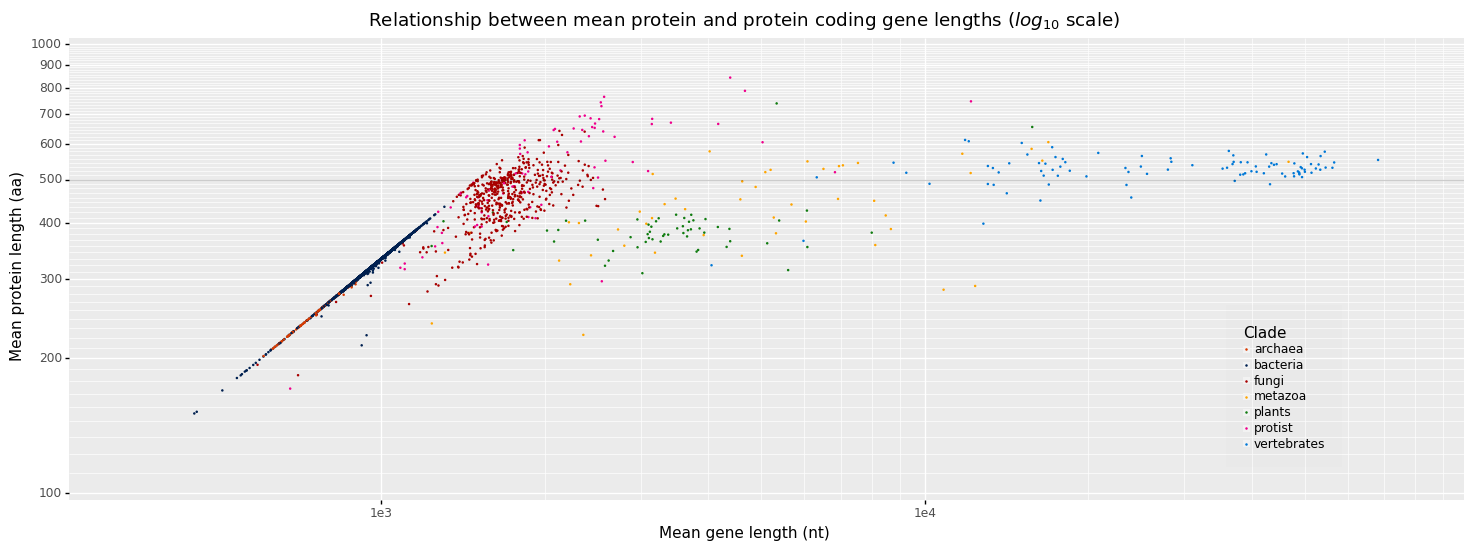

In [5]:
df2plot = merged
col_x = "genes_mean"
col_y = "prots_mean"
legends_by = "Clades"
#
title = "Relationship between mean protein and protein coding gene lengths ($log_{10}$ scale)"
x_lab = "Mean gene length (nt)"
y_lab = "Mean protein length (aa)"

plot__comparing_genes_prots(df2plot, col_x, col_y, x_lab, y_lab, title)

**Figure caption:**   
Each point represents, for one species, the mean of the distribution of the length of its protein coding genes versus the mean of the distribution of the length of its proteins. The horizontal line describes the trend observed in these data, going from a regime in which the average size of the proteins grows proportionally to the average size of the genes, to another in which the size of the protein stabilizes and does not depend on gene length. Lc=(1500nt, 500aa).